In [ ]:
%pip install numpy matplotlib scikit-learn tensorflow pandas

In [ ]:
import numpy as np  # numpy: 벡터와 행렬 연산을 가능하게 해주는 도구
import matplotlib.pyplot as plt #matplotlib.pyplot: 그래프를 그리는 모든 기능이 들어있는 도구 모음
from sklearn.model_selection import (
    train_test_split,
)  # sklearn.model_selection: 데이터를 쪼개고 관리하는 일

# 1. 물리 상수 (G) 및 설정
G = 39.5  # 천문단위(AU), 태양질량(M_sun), 년(Year) 기준 G값


def create_dataset(num_samples):
    print(f"{num_samples}개의 데이터 생성을 시작합니다... (잠시만 기다리세요)")

    X_data = []  # 문제 (노이즈 낀 궤도)
    y_data = []  # 정답 (실제 블랙홀 질량)

    for i in range(num_samples):
        # --- 재료 랜덤 생성 ---
        M_BH = np.random.uniform(1e6, 1e7)  # 질량: 태양의 100만~1000만배
        dist = np.random.uniform(50, 200)  # 거리: 50~200 AU

        # 1. 원 궤도 속도(v_circ) 계산
        v_circ = np.sqrt(G * M_BH / dist) #sqrt: 루트

        # 2. 타원 궤도를 만들기 위해 속도를 조절하되,
        #    0.5 ~ 1.5배 사이로 설정하여 너무 극단적인 궤도가 안 나오게 함.
        #    (너무 느리면 추락, 너무 빠르면 탈출)
        vel_mag = v_circ * np.random.uniform(0.6, 1.4)

        # 3. [핵심] 궤도 방향을 확실하게 수직(Tangent)으로 줌
        #    위치가 (x, 0)이면 속도는 (0, v)여야 돕니다.
        pos = np.array([dist, 0.0])  # array: 리스트를 행렬로 바꿔주는 역할
        vel = np.array([0.0, vel_mag])  # [x방향 속도, y방향 속도]: [0.0, vel_mag]

        # --- 시뮬레이터 (뉴턴 법칙) ---
        # 10년 치 궤도를 0.0    1년 간격으로 계산 (총 100개 포인트)
        # 매우 짧은 기간만 관측했다고 가정!
        time_steps = 100
        dt = 0.002

        trajectory = []

        for _ in range(time_steps):
            r = np.linalg.norm(pos)  # linalg: linear algebra
            accel = -G * M_BH * pos / r**3  # pos: 위치벡터
            vel = vel + accel * dt
            pos = pos + vel * dt
            trajectory.append(pos.copy())

        trajectory = np.array(trajectory)

        # --- [핵심] 노이즈 추가 (데이터 망가뜨리기) ---
        # 관측 오차를 시뮬레이션: 궤도가 지글지글하게 만듦
        noise = np.random.normal(
            0, 2.0, trajectory.shape
        )  # 오차범위 2AU, 0: (오차) 평균, 2.0: (오차) 표준편차
        noisy_trajectory = trajectory + noise

        # 데이터 저장
        X_data.append(noisy_trajectory)
        y_data.append(M_BH)

    print("데이터 생성 완료!")
    return np.array(X_data), np.array(y_data)


# 함수 실행해서 데이터 만들기
X, y = create_dataset(2000)  # 2000개 생성 (노트북 성능에 따라 조절) #X(문제(input)): 관측된 궤도 좌표들, y(정답(output)): 블랙홀 질량

# 학습용(Train)과 테스트용(Test)으로 나누기 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"학습용 데이터: {X_train.shape}")
print(f"테스트용 데이터: {X_test.shape}")  # 결과 :(데이터 수, 시간 기록, 측정값 수)

2000개의 데이터 생성을 시작합니다... (잠시만 기다리세요)
데이터 생성 완료!
학습용 데이터: (1600, 100, 2)
테스트용 데이터: (400, 100, 2)


딥러닝 학습을 시작합니다...
Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 34.9984 - val_loss: 13.3157
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 11.7196 - val_loss: 5.8664
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 6.0342 - val_loss: 5.0145
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 5.8046 - val_loss: 4.3075
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 5.3664 - val_loss: 3.8938
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 4.4556 - val_loss: 2.9409
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 3.8291 - val_loss: 2.6784
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 3.5538 - val_loss: 2.2755
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 3.0283 - val_loss: 2.1886
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 3.1761 - val_loss: 1.6638
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 2.4496 - val_loss: 1.4024
Epoch 12/100
40/40 ━━━━━━━━━━━━

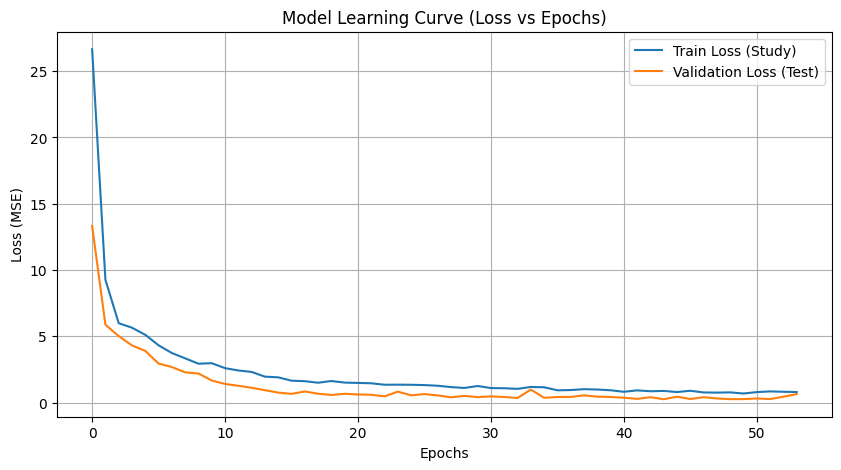

In [ ]:
import tensorflow as tf  # tensorflow: 엔진(딥러닝에 필요한 모든 기능을 총괄하는 대장), 딥러닝 모델을 만들고 훈련시키는(공부하는) 데 특화

# layers: 부품(LSTM(기억), Dense(판단), Dropout(패널티) 등 실제 뇌세포를 만듦)
# models: 몸통(layers 부품들을 하나로 합쳐서 완성된 AI로 만드는 틀)
# callbacks: 감독관(학습 과정을 지켜보다가 과적합 되면 호루라기 불고 멈춤 (EarlyStopping))
# mean_absolute_error: 성적표(정답(실제 질량)과 답안(예측 질량)의 차이를 절댓값으로 계산해줌)

from tensorflow.keras import (
    layers,
    models,
    callbacks,
)  # Keras: 계기판 & 핸들 (엔진을 쉽게 조종하게 해주는 도구)
from sklearn.metrics import (
    mean_absolute_error,
)  # sklearn.metrics: 다 끝난 결과를 놓고 채점하고 분석하는 데 특화


# === 선수 1: LSM (전통적 방식 - 비스 비바 방정식 역산) ===
# 수학 공식을 써서 역으로 질량을 계산하는 함수
def run_LSM_method(orbit_data):
    # 공식: v^2 = GM(2/r - 1/a) 를 이용해서 M을 역추적
    # 하지만 노이즈가 심하기도 하고, 궤도의 일부분만 보고 a(장반경)을 구하기어려움.
    # 그래서 가장 일반적인 형태인 원(a=r)이라고 가정(1차 근사)
    predictions = []
    for orbit in orbit_data:
        # 속도 추정 (위치 차이 / 시간 간격)
        dt = 0.002
        v_est = np.linalg.norm(np.diff(orbit, axis=0), axis=1) / dt #diff: 바로 뒤의 값에서 앞의 값을 빼는것, 즉 변위를 구하는 것
        r_est = np.linalg.norm(orbit[:-1], axis=1) #axis=0: 수직 방향, axis=1: 수평 방향

        # M = v^2 * r / G (원궤도 근사 역산 - 가장 기본적인 LSM 접근)
        M_estimates = (v_est**2 * r_est) / G
        predictions.append(np.mean(M_estimates))  # 평균값 사용
    return np.array(predictions)


# === 선수 2: LSTM (딥러닝 - 학생의 모델) ===
# 정규화 (숫자가 너무 크면 AI가 힘들어해서 100만으로 나눠줌)
SCALE_FACTOR = 1e6
y_train_scaled = y_train / SCALE_FACTOR
y_test_scaled = y_test / SCALE_FACTOR

# 모델 설계 (Dropout 포함!)
model = models.Sequential(
    [
        layers.Input(shape=(100, 2)),  # 입력: 100개의 (x,y) 좌표
        layers.LSTM(64, return_sequences=False),  # 패턴 파악 #return_sequences=False: 100개의 (x,y) 좌표 움직임을 지켜보고 요약해서 압축된 정보를 뽑아냅니다.
        layers.Dropout(0.3),  # [강건성] 맷집 키우기! (방금 넘어온 정보 중 30%를 랜덤으로 버리기)
        layers.Dense(32, activation="relu"), #activation="relu": 단순한 비례식(직선)말고 복잡한 패턴(곡선)도 만들기위해 사용
        layers.Dense(1),  # 출력: 질량 예측(위에서 복잡하게 계산한 결과들을 취합해서 하나의 숫자로 만듬.)
    ]
)

# 채점 기준(MSE) 설정
model.compile(optimizer="adam", loss="mse") #mse는 점수 매기는 법, adam은 공부하는 요령

# [감시자] Early Stopping 설정
early_stop = callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
) #val_loss: 검증용 데이터(Validation Set)의 오차, restore_best_weights=True: 가장 좋았던 시절로 되돌리기

# 학습 시작!
print("딥러닝 학습을 시작합니다...")
history = model.fit(
    X_train,
    y_train_scaled,
    validation_split=0.2,
    epochs=100,  # 최대 100번 공부
    batch_size=32, #문제 32개 풀 때마다 정답 맞혀보고 공부 방법(가중치) 고치기
    callbacks=[early_stop],  # 감시자 붙이기
    verbose=1, #진행 막대와 수치를 실시간으로 보여줌
)

# [추가 코드 1] 학습 과정(Fitting) 시각화 - 교수님 요청 사항
plt.figure(figsize=(10, 5)) #plt: 화가 로봇
plt.plot(history.history["loss"], label="Train Loss (Study)") #plot: 점들을 찍고 선으로 잇게하는 명령어(함수)
plt.plot(history.history["val_loss"], label="Validation Loss (Test)") #오차 점수(['loss'])
plt.title("Model Learning Curve (Loss vs Epochs)")
plt.xlabel("Epochs") #epoch: 학습 횟수
plt.ylabel("Loss (MSE)")
plt.legend() #범례(legend) 표시
plt.grid(True) #grid: 모눈 종이 눈금
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
LSM 평균 오차: 13506220
LSTM 평균 오차: 400089


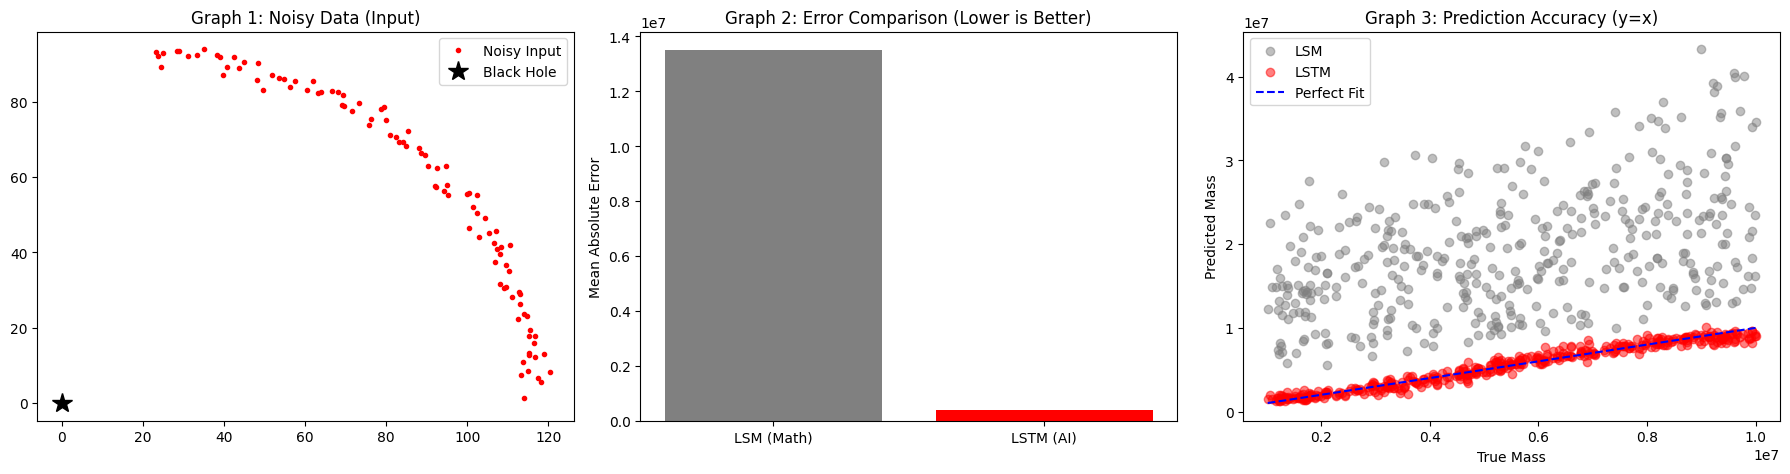

In [ ]:
# --- 결과 예측 ---
# 1. LSM 예측
lsm_pred = run_LSM_method(X_test)

# 2. LSTM 예측 (다시 100만 곱해서 원상복구)
lstm_pred_scaled = model.predict(X_test)
lstm_pred = lstm_pred_scaled.flatten() * SCALE_FACTOR #flatten: 2차원 행렬 형태에서 1차원 리스트로 바꾸기, SCALE_FACTOR: 단위 원상복구

# --- 오차 계산 ---
lsm_error = mean_absolute_error(y_test, lsm_pred)
lstm_error = mean_absolute_error(y_test, lstm_pred)

print(f"LSM 평균 오차: {lsm_error:.0f}")
print(f"LSTM 평균 오차: {lstm_error:.0f}")

# === 그래프 그리기 (PPT용) ===
plt.figure(figsize=(18, 5))

# [그래프 1] 문제 상황: 엉망인 데이터 보여주기
plt.subplot(1, 3, 1) #subplot: 하나의 figure를 여러 칸으로 쪼개서 쓰는 기능, plt.subplot(행, 열, 몇번째)
plt.title("Graph 1: Noisy Data (Input)")
# 첫 번째 테스트 데이터 하나만 예시로 그림
plt.plot(X_test[0][:, 0], X_test[0][:, 1], "r.", label="Noisy Input") #r:red, .: dot
plt.plot(0, 0, "k*", markersize=15, label="Black Hole")
plt.legend()

# [그래프 2] 성능 비교: 막대 그래프
plt.subplot(1, 3, 2)
plt.title("Graph 2: Error Comparison (Lower is Better)")
bar_colors = ["gray", "red"]
plt.bar(["LSM (Math)", "LSTM (AI)"], [lsm_error, lstm_error], color=bar_colors)
plt.ylabel("Mean Absolute Error")

# [그래프 3] 정답 확인: 산점도 (y=x)
plt.subplot(1, 3, 3)
plt.title("Graph 3: Prediction Accuracy (y=x)")
plt.scatter(y_test, lsm_pred, alpha=0.5, c="gray", label="LSM") #alpha: 투명도(0.0~1.0), c: color
plt.scatter(y_test, lstm_pred, alpha=0.5, c="red", label="LSTM")
plt.plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)], "b--", label="Perfect Fit"
)

plt.xlabel("True Mass")
plt.ylabel("Predicted Mass")
plt.legend()

plt.tight_layout() #tight_layout: 글씨 안 잘리게 여백이랑 간격 타이트하게 재조정
plt.show()